# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Bitcoin_price_train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train

,date,close,open,high,low,volune,change
0,2021年7月14日,32820.7,32727.8,33051.9,31611.2,69.56K,0.0028
1,2021年7月13日,32728.1,33106.1,33307.7,32259.5,60.04K,-0.0116
2,2021年7月12日,33113.0,34228.3,34598.0,32662.8,63.24K,-0.0326
3,2021年7月11日,34227.7,33510.8,34580.6,33319.8,35.72K,0.0214
4,2021年7月10日,33510.6,33797.7,34221.0,33056.8,50.94K,-0.0085
...,...,...,...,...,...,...,...
1122,2018年6月18日,6719.8,6460.5,6794.5,6410.9,135.70K,0.0402
1123,2018年6月17日,6460.3,6505.8,6593.0,6452.1,90.67K,-0.0070
1124,2018年6月16日,6505.8,6410.0,6564.2,6358.0,108.79K,0.0149
1125,2018年6月15日,6410.3,6647.3,6655.8,6395.7,143.53K,-0.0356


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1127):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
model=regressor.fit(X_train, y_train, epochs = 100 , batch_size = 32)

Epoch 1/100
34/34 [==============================] - 4s 106ms/step - loss: 7.0584e-04
Epoch 2/100
34/34 [==============================] - 4s 104ms/step - loss: 6.1776e-04
Epoch 3/100
34/34 [==============================] - 4s 104ms/step - loss: 7.0388e-04
Epoch 4/100
34/34 [==============================] - 4s 107ms/step - loss: 7.1668e-04
Epoch 5/100
34/34 [==============================] - 4s 104ms/step - loss: 7.5764e-04
Epoch 6/100
34/34 [==============================] - 4s 104ms/step - loss: 5.5619e-04
Epoch 7/100
34/34 [==============================] - 4s 105ms/step - loss: 5.9289e-04
Epoch 8/100
34/34 [==============================] - 4s 104ms/step - loss: 6.1051e-04
Epoch 9/100
34/34 [==============================] - 4s 105ms/step - loss: 7.6595e-04
Epoch 10/100
34/34 [==============================] - 4s 106ms/step - loss: 4.7848e-04
Epoch 11/100
34/34 [==============================] - 4s 104ms/step - loss: 6.2121e-04
Epoch 12/100
34/34 [==============================] 

ValueError: ignored

In [6]:
model = ...  # Get model (Sequential, Functional Model, or Model subclass)
el.save('path/to/location')

AttributeError: ignored

In [8]:
model.summary()

AttributeError: ignored

## Part 3 - Making the predictions and visualising the results

### Getting the real  price of 2018-2021




In [ ]:
dataset_test = pd.read_excel('Bitcoin_price_test.xlsx')
real__price= dataset_test.iloc[:, 1:2].values
real__price

array([[6598.4],
       [6513.5],
       [6619.5],
       [6366.8],
       [6398.9],
       [6213.3],
       [5883.5],
       [6154.9],
       [6082.1],
       [6256.6],
       [6154.6],
       [6167.3],
       [6055.7],
       [6728. ],
       [6765.4],
       [6752.4],
       [6719.8],
       [6460.3],
       [6505.8],
       [6410.3],
       [6647.1]])

### Getting the predicted  price of 2021


In [ ]:
dataset_total = pd.concat((dataset_train['close'], dataset_test['close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 82):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted__price = regressor.predict(X_test)
predicted__price = sc.inverse_transform(predicted__price)

### Visualising the results

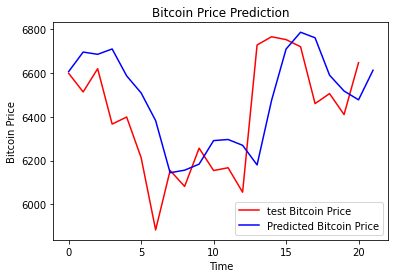

In [ ]:
plt.plot(real__price, color = 'red', label = 'test Bitcoin Price')
plt.plot(predicted__price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

Saving model

In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
def get_model():

model.save("my_model")

IndentationError: ignored